In [77]:
%matplotlib inline
import numpy as np
from utils import standardize
from algorithms.VarianceReduction.pca import PCA
from sklearn.decomposition import PCA as pc
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [56]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [57]:
X = faces.data
y = faces.target

First, let's take a look at images in the dataset.

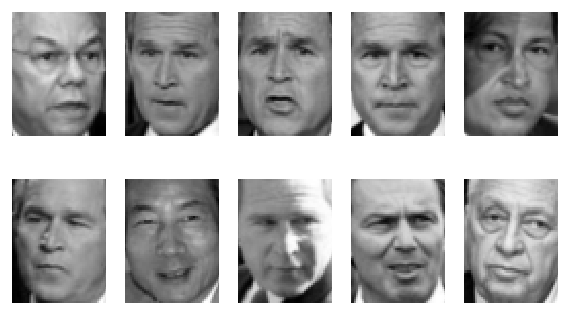

In [62]:
fig, ax = plt.subplots(2, 5, figsize=(8, 5), sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X[i].reshape(62, 47)
    ax[i].imshow(img, cmap='binary_r')
    
ax[0].set_yticks([])
ax[0].set_xticks([])
plt.tight_layout()

Next, let's transform the dataset using principal component analysis, and find the 95% cutoff point for explained variance.

In [89]:
pca = PCA()
pca.fit(X)

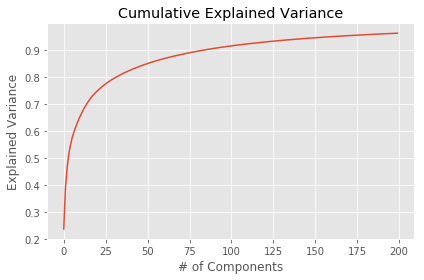

In [93]:
plt.plot(range(200), np.cumsum(pca.variance_ratios_[:200]))
plt.title('Cumulative Explained Variance')
plt.xlabel('# of Components')
plt.ylabel('Explained Variance')
plt.tight_layout()

As we can see from above, our first 75 components accounts for about 90% of the variance within our dataset, and our first 150 account for approximately 95 %.

The visual representations of our components reveal exactly how the images vary from pixel to pixel.

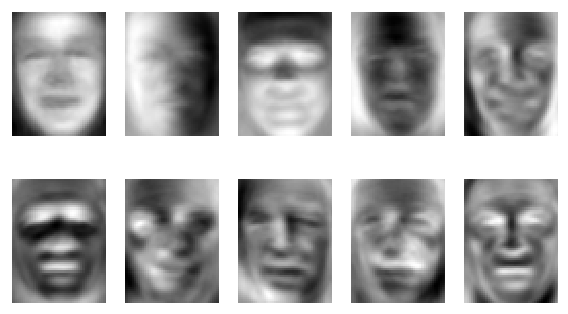

In [97]:
fig, ax = plt.subplots(2, 5, figsize=(8, 5), sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = pca.components.real.T[i].reshape(62, 47)
    ax[i].imshow(img, cmap='binary_r')
    
ax[0].set_yticks([])
ax[0].set_xticks([])
plt.tight_layout()

As you can see, the faces differ somewhat on how exactly difference is captured within the photograph.  For some, much of it happens with lighting shown directly on their face, and for others, it's how small details of their physical characteristics are presented.  

Let's see how closely these are represented using the first 150 components, which explain 95% of the variance.

Now let's take a look at how the images look with our first 75 components used to generate them.

In [100]:
pca2 = PCA(n_components=75)

In [101]:
pca2.fit(X)

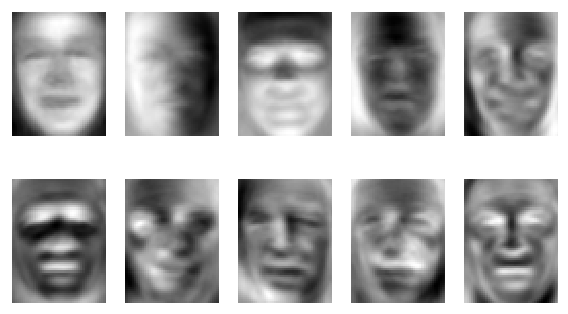

In [102]:
fig, ax = plt.subplots(2, 5, figsize=(8, 5), sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = pca2.components.real.T[i].reshape(62, 47)
    ax[i].imshow(img, cmap='binary_r')
    
ax[0].set_yticks([])
ax[0].set_xticks([])
plt.tight_layout()

As we can see, most of the visual details of the original Eigen Faces were preserved.

Now let's re-create the original data from the 75 components that we have right now, to see how much of the original face is preserved.

In [135]:
transformed = pca2.transform(X)
inverse_X = transformed.real @ pca2.components.real.T + transformed.real.mean()

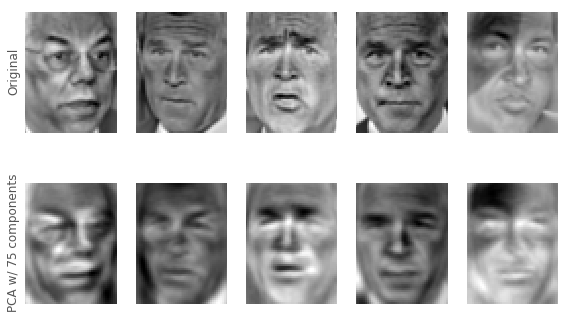

In [142]:
fig, ax = plt.subplots(2, 5, figsize=(8, 5), sharex=True, sharey=True, subplot_kw={'xticks':[], 'yticks':[]})
for i in range(5):
    ax[0, i].imshow(X[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(inverse_X[i].reshape(62, 47), cmap='binary_r')

ax[0, 0].set_ylabel('Original')
ax[1, 0].set_ylabel('PCA w/ 75 components');    
plt.tight_layout()

As we can see from above, reducing our dataset from 2914 to 75 dimensions allows us to maintain a reasonable facsimile of the original signal inside of our dataset, even though we reduced its dimensionality by over 5X.